In [1]:
# Import libraries
import glob
import numpy as np
import matplotlib.pyplot as plt
import corner
import math
from IPython.display import display, Math
plt.rcParams['font.size'] = '14'

In [2]:
grid_data = np.loadtxt('./Adaptive_Grid_Method/solved_model_calibration.txt')
grid = np.loadtxt('./Adaptive_Grid_Method/grid_model_calibration.txt')

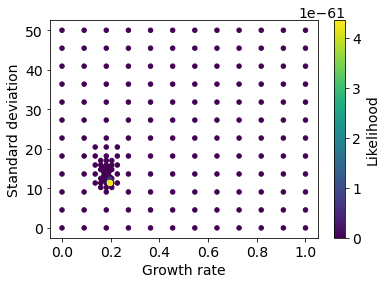

In [3]:
fig, ax = plt.subplots()
ax.set_ylabel('Standard deviation')
ax.set_xlabel('Growth rate')
im = ax.scatter(grid_data[:,0],grid_data[:,1], c=np.exp(grid_data[:,2]), s=20)
#im = ax.scatter(grid_data[:,0],grid_data[:,1], c=grid_data[:,2], s=20)
fig.colorbar(im, ax=ax,label='Likelihood')
plt.savefig('solution_grid.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

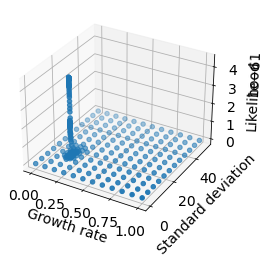

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_ylabel('Standard deviation')
ax.set_xlabel('Growth rate')
ax.set_zlabel('Likelihood')
im = ax.scatter(grid_data[:,0],grid_data[:,1], np.exp(grid_data[:,2]), s=20)
plt.savefig('solution_grid.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

<ipython-input-5-656833a78b3e>:18: UserWarning: The following kwargs were not used by contour: 'color'
  CS = plt.contour(xi,yi,zi,15,linewidths=0.5,color='k')


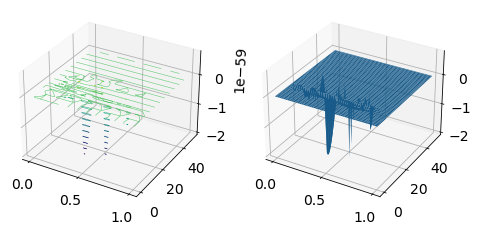

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
# note this: you can skip rows!
X = grid_data[:,0]
Y = grid_data[:,1]
Z = np.exp(grid_data[:,2])

xi = np.linspace(X.min(),X.max(),100)
yi = np.linspace(Y.min(),Y.max(),100)
# VERY IMPORTANT, to tell matplotlib how is your data organized
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

CS = plt.contour(xi,yi,zi,15,linewidths=0.5,color='k')
ax = fig.add_subplot(1, 2, 2, projection='3d')

xig, yig = np.meshgrid(xi, yi)

surf = ax.plot_surface(xig, yig, zi,
        linewidth=0)

plt.show()

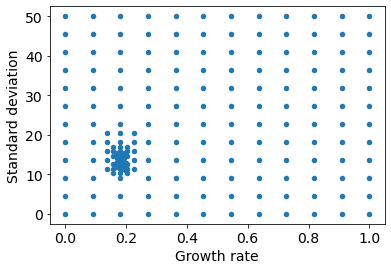

In [6]:
fig, ax = plt.subplots()
ax.set_ylabel('Standard deviation')
ax.set_xlabel('Growth rate')
im = ax.scatter(grid_data[:,0],grid_data[:,1], s=20)
plt.savefig('model_grid.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

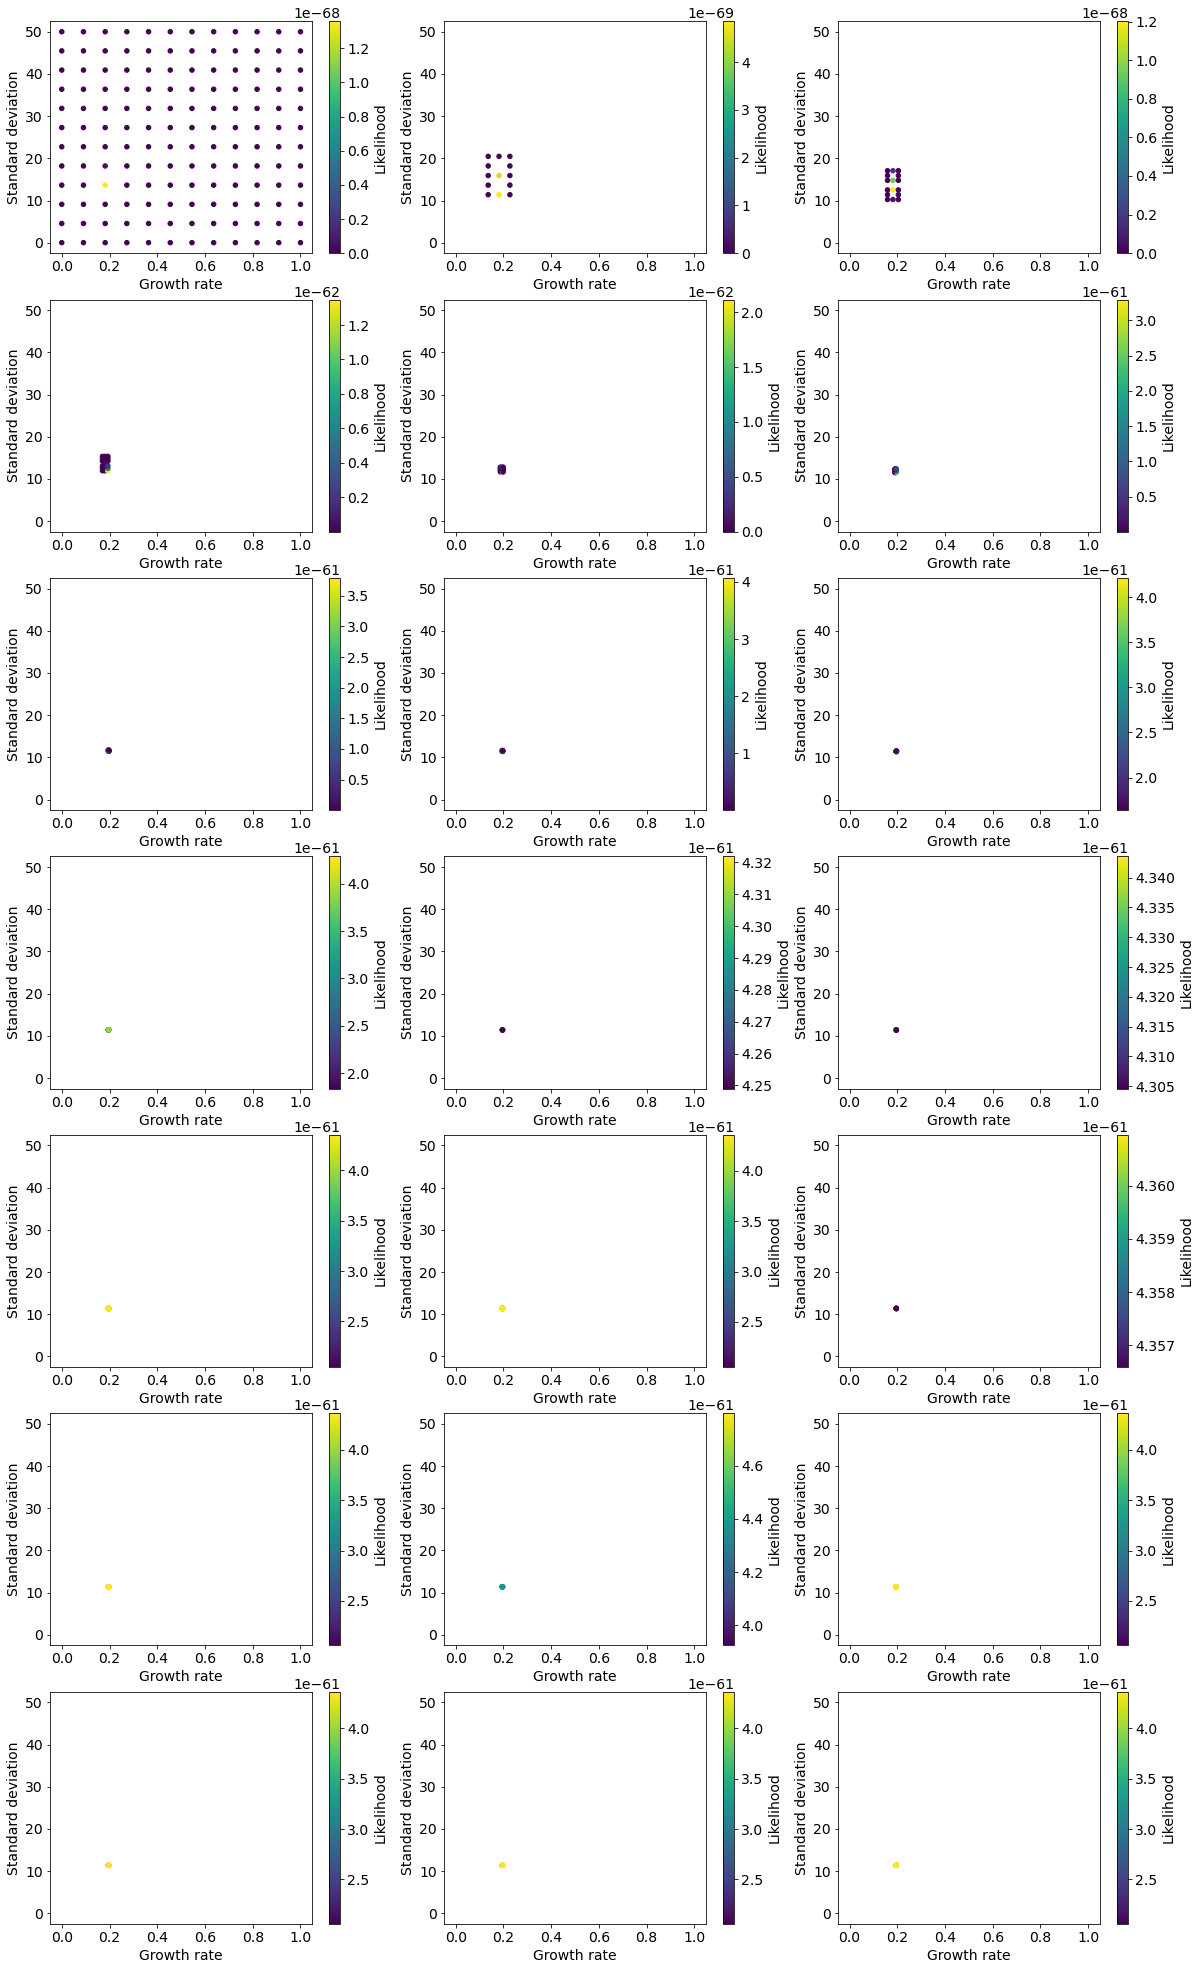

In [7]:
FilenamesList = glob.glob('./Adaptive_Grid_Method/solved_model_calibration_lvl*.txt')
SortedList = sorted(FilenamesList)
rows = math.ceil(len(SortedList)/3)
rsize = rows*5
fig, axes = plt.subplots(rows,3, figsize=(20, rsize), sharex=False, sharey=False)
for p in range(len(SortedList)):
    ax = axes[math.floor(p/3)][p%3]
    ax.set_ylabel('Standard deviation')
    ax.set_xlabel('Growth rate')
    data = np.loadtxt(SortedList[p])
    im = ax.scatter(data[:,0],data[:,1], c=np.exp(data[:,2]), s=20)
    if p == 0:
        ylim = ax.get_ylim()
        xlim = ax.get_xlim()
    else:
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
    fig.colorbar(im, ax=ax,label='Likelihood')
plt.savefig('all_grids.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

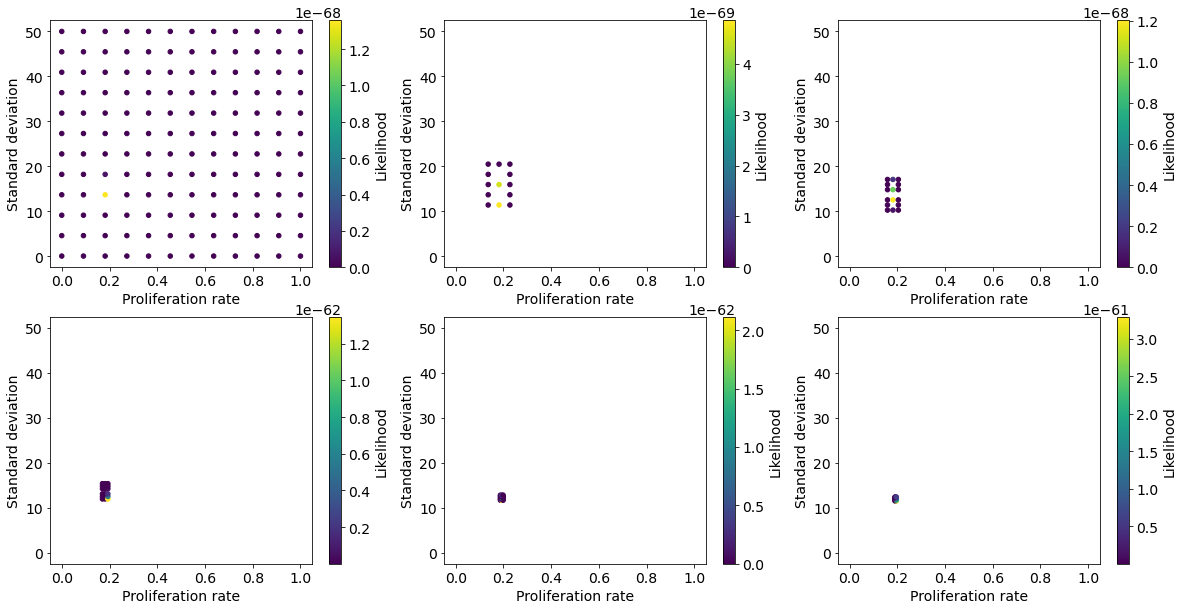

In [10]:
FilenamesList = glob.glob('./Adaptive_Grid_Method/solved_model_calibration_lvl*.txt')
SortedList = sorted(FilenamesList)
rows = math.ceil(len(SortedList)/3)
rsize = 2*5
fig, axes = plt.subplots(2,3, figsize=(20, rsize), sharex=False, sharey=False)
for p in range(0,6):
    ax = axes[math.floor(p/3)][p%3]
    ax.set_ylabel('Standard deviation')
    ax.set_xlabel('Proliferation rate')
    data = np.loadtxt(SortedList[p])
    im = ax.scatter(data[:,0],data[:,1], c=np.exp(data[:,2]), s=20)
    if p == 0:
        ylim = ax.get_ylim()
        xlim = ax.get_xlim()
    else:
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
    fig.colorbar(im, ax=ax,label='Likelihood')
plt.savefig('all_grids.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()